{
  "node_id": "3f729249-aac1-405f-9cc2-b3f76b7634fb",
  "name": "result",
  "dtype": "torch.float16",
  "shape": [
    20,
    30,
    4
  ]
}


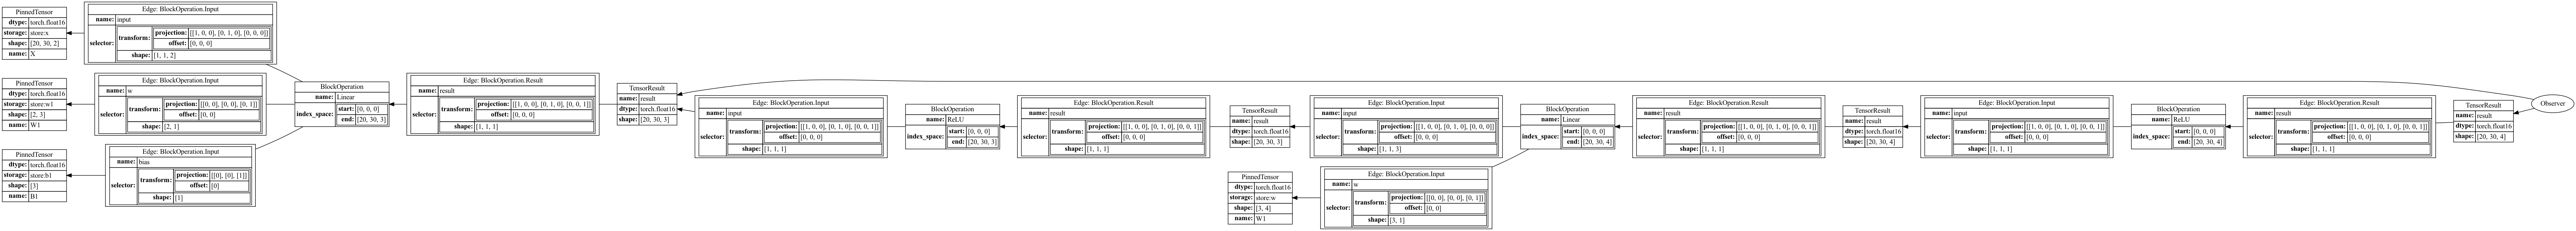

In [2]:
from dataclasses import dataclass

import marshmallow_dataclass

from tapestry.jupyter_utils import display_graph
from tapestry.raw_edge import raw
from tapestry.serialization.json_serializable import JsonLoadable

display_graph(raw())